In [1]:
from IPython.display import HTML
from __future__ import print_function
import numpy as np
from bqplot import *
from ipywidgets import widgets, interact, Label
from traitlets import link
from traitlets import HasTraits, Float
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
from IPython.display import display
from matplotlib import rcParams
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


## Using Mohr's Circle to Find the Strains and Stresses on the Surface of a Strain Gauged Part

Strain gauge rosettes are normally placed on the surface of a part in order to record the (small, typically elastic) strains on that part.  These strain gauges are made up of fine metallic wires whose electrical resistance changes when they are stretched.  This change in electrical resistance can then be calibrated to a change in *normal* strain (e.g. $\epsilon_{xx}$).  Strain gauges *can't* directly measure shear strains but by measuring three normal strains on the surface of a part, with the angle between the strain gauges known, we can obtain the full (2D) strain tensor for the surface of the part.

Let's take an example to illustrate.  In order to talk about strains, we must have (at least) one coordinate system - here we will draw an {x,y} coordinate system which is imagined to sit on the free surface of a part.

(-6.5, 6.5, -1.0, 6.5)

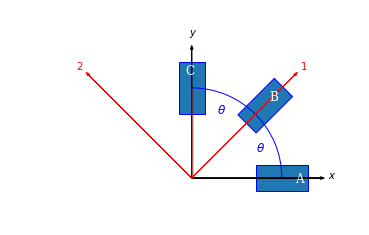

In [2]:
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt

from matplotlib.patches import Arc, Rectangle

plt.figure()
plt.axis('image')
ax = plt.gca() 
ax.arrow(0,0,0,5,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0,0,5,0,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
ax.arrow(0,0,4,4,head_width=0.1, head_length=0.15, fc='r', ec='r',lw=1,alpha=1)
ax.arrow(0,0,-4,4,head_width=0.1, head_length=0.15, fc='r', ec='r',lw=1,alpha=1)

ax.set_xlim(-6.5,6.5)
ax.set_ylim(-1,6.5)
txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 10}
plt.text(-0.1,5.5, '$y$', fontdict=txtfont)
plt.text(5.3,-0.05, '$x$', fontdict=txtfont)
txtfont = {'family': 'serif','color':  'r','weight': 'normal','size': 10}
plt.text(4.2,4.2, '$1$', fontdict=txtfont)
plt.text(-4.5,4.2, '$2$', fontdict=txtfont)


ax.arrow(0,0,0,3.5,head_width=0.0, head_length=0.0, fc='r', ec='r',lw=3,alpha=0.3)
ax.add_patch(Rectangle((2.5, -0.5), 2, 1, angle=0.0, fill=True, edgecolor='b'))
ax.add_patch(Rectangle((2.5, 1.75), 2, 1, angle=45.0, fill=True, edgecolor='b'))
ax.add_patch(Rectangle((0.5, 2.5), 2, 1, angle=90.0, fill=True, edgecolor='b'))

txtfont = {'family': 'serif','color':  'b','weight': 'normal','size': 12}
ax.add_patch(Arc((0, 0), 7, 7, angle=0.0, theta1=0.0, theta2=45.0, edgecolor='b'))
ax.add_patch(Arc((0, 0), 7, 7, angle=45.0, theta1=0.0, theta2=45.0, edgecolor='b'))
plt.text(2.5,1, '$\\theta$', fontdict=txtfont)
plt.text(1,2.5, '$\\theta$', fontdict=txtfont)

txtfont = {'family': 'serif','color':  'w','weight': 'normal','size': 12}
plt.text(4,-0.2, 'A', fontdict=txtfont)
plt.text(3,3, 'B', fontdict=txtfont)
plt.text(-0.25,4, 'C', fontdict=txtfont)

plt.axis('off')



Here we have three strain gauges (the blue rectangles) located at $\theta$ = 45$^\circ$ from one another.  We have aligned strain gauges A and C with the {$x$,$y$} coordinate system.  Thus, strain gauge A will measure the normal strain ($\epsilon^A_{xx}$) along the $x$ direction in this coordinate system and strain gauge C will measure the normal strain ($\epsilon^C_{yy}$) along the $y$ direction in this coordinate system.

Strain gauge B does not align with either of the $x$ or $y$ directions so how the normal strain it measures relates to the strains in the {$x$,$y$} coordinate system is not immediately obvious.  However, we can draw a second coordinate system, the {$1$,$2$} which does align with strain gauge B.  In this case, the normal strain measured by strain gauge B ($\epsilon^B_{11}$) is along the $1$ direction.

Now, we have 2/3's of the information we need in order to define all of our (2 dimensional) strains in this case, aligned with the {$x$,$y$} coordinate system.  All we miss is the shear strain $\epsilon_{xy}$ which can't be measured directly by a strain gauge (remember, strain gauges only measure normal strains).  

To determine $\epsilon_{xy}$ we need to make use of Mohr's circle and the three measured strains.  Remember, Mohr's circle (and the associated equations representing it) allow us to relate the strains in one coordinate system to the strains in another coordinate system; here we can relate the strain measured aligned with the {$1$,$2$} coordinate system to the strains measured aligned with the {$x$,$y$} coordinate system.

Remember that Mohr's circle tells us that our normal strains in two coordinate systems are related by:

$\epsilon_{11} = \frac{\left(\epsilon_{xx} + \epsilon_{yy}\right)}{2} + \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\cos{\left(2\theta\right)} + \epsilon_{xy}\sin{\left(2\theta\right)}$

Looking at this equation we can see that we know $\epsilon_{11} = \epsilon^B_{11}$, $\epsilon_{xx} = \epsilon^A_{xx}$, $\epsilon_{yy} = \epsilon^C_{yy}$ and $\theta$ = 45$^\circ$, the angle between the coordinate systems.

The case shown above is particularly simple since $2\theta$ = 90$^\circ$ so $\cos{\left(2\theta\right)}$ = 0 and $\sin{\left(2\theta\right)}$ = 1 meaning that,

$\epsilon^B_{11} = \frac{\left(\epsilon^A_{xx} + \epsilon^C_{yy}\right)}{2} + \epsilon_{xy}$

Or,

$\epsilon_{xy} = \epsilon^B_{11} - \frac{\left(\epsilon^A_{xx} + \epsilon^C_{yy}\right)}{2}$

if we want the engineering shear strain ($\gamma_{xy}$) we just have to remember that $\epsilon_{xy} = \gamma_{xy}/2$ so that,

$\gamma_{xy} = 2\epsilon^B_{11} - \epsilon^A_{xx} - \epsilon^C_{yy}$

Now we know all three strains in the {$x$,$y$} coordinate system ($\epsilon^A_{xx}$, $\epsilon^C_{yy}$ and $\epsilon_{xy}$) so we can find the strains resolved along any other coordinate system we want using Mohr's circle!

Of course, these results are not limited to having the strain gauges oriented 45$^\circ$ apart from one another.  There are many other common 'rosette' strategies (e.g. 3 gauges each 120$^\circ$ apart).  To deal with the case of 3 strain gauges at different angles from one another we need to imagine each of them being aligned with their own coordinate system and then relating these to a reference {$x$,$y$} coordinate system.  In the figure below you can position the three strain gauges at different angles and input different measured values of the strain for each gauge.  The output on the far right then shows the values of the strains $\epsilon_{xx}$, $\epsilon_{yy}$ and $\epsilon_{xy}$ (aligned with the {$x$,$y$} coordinate system) calculated from $\epsilon_{A}$, $\epsilon_{B}$ and $\epsilon_{C}$.  


In [3]:
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle

def calcstrain(th1,th2,th3,eA,eB,eC):

    th1 = th1*np.pi/180.
    th2 = th2*np.pi/180.
    th3 = th3*np.pi/180.
    
    eabc = np.transpose(np.matrix([eA,eB,eC]))
    
    M = np.matrix([[0.5*((1+np.cos(2.*th1))), 0.5*((1-np.cos(2.*th1))), np.sin(2.*th1)],
                   [0.5*((1+np.cos(2.*th2))), 0.5*((1-np.cos(2.*th2))), np.sin(2.*th2)],
                   [0.5*((1+np.cos(2.*th3))), 0.5*((1-np.cos(2.*th3))), np.sin(2.*th3)]])
    
    Minv = np.linalg.inv(M)
    e = np.dot(Minv,eabc)
    
    plt.figure()
    plt.axis('image')
    ax = plt.gca() 

    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 18}
    plt.text(-0.06,0.04,'Calculation of Strains in {$x$,$y$} Coordinate System', fontdict=txtfont)
    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 18}
    plt.text(-0.06,-0.01, '$ \\epsilon_{xx}$ = %0.3f\n $\\epsilon_{yy}$ = %0.3f\n $\\epsilon_{xy}$ = %0.3f' %(e[0,0],e[1,0],e[2,0]), fontdict=txtfont)
    plt.axis('off')
    
    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 16}
    plt.text(-0.06,-0.04, 'Recall:  When $\\theta_{Ax}$=0$^\circ$,$\\theta_{Bx}$=45$^\circ$ and $\\theta_{Ax}$=90$^\circ$',fontdict=txtfont)
    plt.text(-0.06,-0.06, '$\epsilon_{xx}$ = $\epsilon_{A}$ \n $\epsilon_{yy}$ = $\epsilon_{C}$',fontdict=txtfont)
    plt.text(-0.06,-0.07, '$\epsilon_{xy}$ = $\epsilon_{B}$-($\epsilon_{A}$+$\epsilon_{C}$)/2',fontdict=txtfont)
             
             #, $\epsilon_{yy}$ = $\epsilon_{C}$') #and $\epsilon_{xy}$ = $\epsilon_{B}-\left(\epsilon_{A}+\epsilon_{C}\right)/2$',fontdict=txtfont)
    
    return(e[0,0],e[1,0],e[2,0])


def straingaugeangle(th1,th2,th3,eA,eB,eC):
    th1 = th1*np.pi/180
    th2 = th2*np.pi/180
    th3 = th3*np.pi/180
    
    eabc = np.transpose(np.matrix([eA,eB,eC]))
    
    angle = [th1,th2,th3]
    
    vx = np.matrix([5.,0.])
    vy = np.matrix([0.,5.])
    

    plt.figure()
    plt.axis('image')
    ax = plt.gca() 
 
    ax.arrow(0,0,0,5,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
    ax.arrow(0,0,5,0,head_width=0.1, head_length=0.15, fc='k', ec='k',lw=1,alpha=1)
    
    i = 0
    col=['r','b','g']
    lab=['A','B','C']
    
    for x in angle:
        th = x
        R = np.matrix([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
        vv1 = np.dot(R,np.transpose(vx))
        ax.arrow(0,0,vv1[0,0],vv1[1,0],head_width=0.1, head_length=0.15, fc=col[i], ec=col[i],lw=1,alpha=1)
        transx = vv1[1,0]*0.1
        transy = -vv1[0,0]*0.1
        ax.add_patch(Rectangle((vv1[0,0]*0.5+transx, vv1[1,0]*0.5+transy), 2, 1, angle=th*180/np.pi, fill=True, edgecolor=col[i],facecolor=col[i]))
        
        txtfont = {'family': 'serif','color':  col[i],'weight': 'normal','size': 12}
        plt.text(vv1[0,0]+transx,vv1[1,0]+transy, lab[i], fontdict=txtfont)
        i=i+1
    
    ax.set_xlim(-6.5,6.5)
    ax.set_ylim(-6.5,6.5)
    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 10}
    plt.text(-0.1,5.5, '$y$', fontdict=txtfont)
    plt.text(5.3,-0.05, '$x$', fontdict=txtfont)
    plt.axis('off')
    
    
w = dict(th1 = BoundedFloatText(0, min=-180, max=180, step=1., description='$\\theta_{Ax}$ (Deg.):',layout=Layout(width='99%')), 
         th2 = BoundedFloatText(45, min=-180, max=180, step=1., description='$\\theta_{Bx}$ (Deg.):',layout=Layout(width='99%')),
         th3 = BoundedFloatText(90, min=-180, max=180, step=1., description='$\\theta_{Cx}$(Deg.):',layout=Layout(width='99%')),
         eA = BoundedFloatText(0, min=-0.1, max=0.1, step=1., description='$\epsilon_A$:',layout=Layout(width='99%')),
         eB = BoundedFloatText(0, min=-0.1, max=0.1, step=1., description='$\epsilon_B$:',layout=Layout(width='99%')),
         eC = BoundedFloatText(0, min=-0.1, max=0.1, step=1., description='$\epsilon_C$:',layout=Layout(width='99%')))

output = interactive_output(straingaugeangle, w)
output2 = interactive_output(calcstrain,w)

box = HBox([VBox([*w.values()]), output,output2],border='solid 2px')
display(box)

A Jupyter Widget

But how do we calculate the values of $\epsilon_{xx}$, $\epsilon_{yy}$ and $\epsilon_{xy}$ shown on the far right?

Lets go back to our Mohr's circle equation relating a normal strain along an axis (in this case the 'A' axis) and the normal strains in another coordinate system (in this case the {$x$,$y$} coordinate system).

$\epsilon_{A} = \frac{\left(\epsilon_{xx} + \epsilon_{yy}\right)}{2} + \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\cos{\left(2\theta_{Ax}\right)} + \epsilon_{xy}\sin{\left(2\theta_{Ax}\right)}$

Here we know $\epsilon_{A}$ (measured from the strain gauge) and $\theta_Ax$, the angle between the $x$ axis and the 'A' axis.  Our unknowns are the three strains $\epsilon_{xx}$, $\epsilon_{yy}$ and $\epsilon_{xy}$.  So at this point we have 1 equation and 3 unknowns.  We can, however, write the same equations for the other two measured strains $\epsilon_B$ and $\epsilon_C$:

$\epsilon_{B} = \frac{\left(\epsilon_{xx} + \epsilon_{yy}\right)}{2} + \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\cos{\left(2\theta_{Bx}\right)} + \epsilon_{xy}\sin{\left(2\theta_{Bx}\right)}$

$\epsilon_{C} = \frac{\left(\epsilon_{xx} + \epsilon_{yy}\right)}{2} + \frac{\left(\epsilon_{xx} - \epsilon_{yy}\right)}{2}\cos{\left(2\theta_{Cx}\right)} + \epsilon_{xy}\sin{\left(2\theta_{Cx}\right)}$

Now we have 3 equations for our 3 unknowns!

Written as we have them above, the equations are not obvious to solve.  Let's isolate our three unknown strains:

$\epsilon_{A} = \epsilon_{xx}\left(\frac{1}{2}+\frac{\cos{\left(2\theta_{Ax}\right)}}{2}\right)+\epsilon_{yy}\left(\frac{1}{2}-\frac{\cos{\left(2\theta_{Ax}\right)}}{2}\right) + \epsilon_{xy}\sin{\left(2\theta_{Ax}\right)}$

$\epsilon_{B} = \epsilon_{xx}\left(\frac{1}{2}+\frac{\cos{\left(2\theta_{Bx}\right)}}{2}\right)+\epsilon_{yy}\left(\frac{1}{2}-\frac{\cos{\left(2\theta_{Bx}\right)}}{2}\right) + \epsilon_{xy}\sin{\left(2\theta_{Bx}\right)}$

$\epsilon_{C} = \epsilon_{xx}\left(\frac{1}{2}+\frac{\cos{\left(2\theta_{Cx}\right)}}{2}\right)+\epsilon_{yy}\left(\frac{1}{2}-\frac{\cos{\left(2\theta_{Cx}\right)}}{2}\right) + \epsilon_{xy}\sin{\left(2\theta_{Cx}\right)}$



This is a linear set of equations where the coefficients coming after $\epsilon_{xx}$, $\epsilon_{yy}$ and $\epsilon_{xy}$ are just constants.  One can solve this algebraically by hand but if you have a scientific calculator nearby there is an easier way...

Lets re-write this whole thing as a matrix equation:

$\begin{pmatrix}
  \epsilon_A  \\
  \epsilon_B  \\
  \epsilon_C 
 \end{pmatrix} = 
 \begin{pmatrix}
  \left(\frac{1}{2}+\frac{\cos{\left(2\theta_{Ax}\right)}}{2}\right) & \left(\frac{1}{2}-\frac{\cos{\left(2\theta_{Ax}\right)}}{2}\right) & \sin{\left(2\theta_{Ax}\right)}\\
    \left(\frac{1}{2}+\frac{\cos{\left(2\theta_{Bx}\right)}}{2}\right) & \left(\frac{1}{2}-\frac{\cos{\left(2\theta_{Bx}\right)}}{2}\right) & \sin{\left(2\theta_{Bx}\right)}\\
      \left(\frac{1}{2}+\frac{\cos{\left(2\theta_{Cx}\right)}}{2}\right) & \left(\frac{1}{2}-\frac{\cos{\left(2\theta_{Cx}\right)}}{2}\right) & \sin{\left(2\theta_{Cx}\right)}\\
 \end{pmatrix} 
 \begin{pmatrix}
  \epsilon_{xx}  \\
  \epsilon_{yy}  \\
  \epsilon_{xy} 
 \end{pmatrix} = \textbf{M}  
 \begin{pmatrix}
  \epsilon_{xx}  \\
  \epsilon_{yy}  \\
  \epsilon_{xy} 
 \end{pmatrix}$
 
 Where $\textbf{M}$ is a matrix whose entries are all calculated just by knowing the angles $\theta_{Ax}$, $\theta_{Bx}$ and $\theta_{Cx}$.  

Now, one way to obtain the values of the unknown strains is to invert this system of equations by multiplying both sides of the equation by the matrix inverse of $\textbf{M}$ (this being written as $\textbf{M$^{-1}$}$)

$\begin{pmatrix}
  \epsilon_{xx}  \\
  \epsilon_{yy}  \\
  \epsilon_{xy} 
 \end{pmatrix} =
\textbf{M$^{-1}$} 
\begin{pmatrix}
  \epsilon_A  \\
  \epsilon_B  \\
  \epsilon_C 
 \end{pmatrix}$
 
 Inverting the matrix $\textbf{M}$ is easy to do with most modern scientific calculators (or using a program like python or matlab...)

# Calculating Stresses Assuming Isotropic Elastic Behaviour

Now that we have our strains on the surface of our material, we may wish to calculate the stresses in our part.  Strain gauges are normally bonded to the free surface of a part meaning that the stress perpendicular to the surface is zero.  We, can, however, determine the stresses in the plane of the part ($\sigma_{xx}$, $\sigma_{yy}$ and $\sigma_{xy}$) using our knowledge of linear elasticity.

From generalized Hooke's Law we have for the normal strains:

$\epsilon_{ii} = \frac{1}{E}\left[\sigma_{ii} - \nu\left(\sigma_{jj}+\sigma_{kk}\right)\right]$

where $i,j,k$ represent the directions $x$, $y$ and $z$ with $z$ being normal to the free surface.  Now, since on our free surface $\sigma_{zz}$ = 0 we have:

$\epsilon_{xx} = \frac{1}{E}\left[\sigma_{xx} - \nu\left(\sigma_{yy}\right)\right]$

$\epsilon_{yy} = \frac{1}{E}\left[\sigma_{yy} - \nu\left(\sigma_{xx}\right)\right]$

If you re-arrange these equations you have:
    
$\sigma_{xx} = \frac{E}{\left(1-\nu^2\right)}\left(\epsilon_{xx}+\nu\epsilon_{yy}\right)$

$\sigma_{yy} = \frac{E}{\left(1-\nu^2\right)}\left(\epsilon_{yy}+\nu\epsilon_{xx}\right)$

We can also calculate the shear stress $\sigma_{xy}$ directly,

$\sigma_{xy} = G\gamma_{xy} = G\left( 2\epsilon_{xy}\right)$

Becareful here!  Hooke's Law makes use of the engineering definition of shear strain in its simplest form

But we aren't quite done... while there can be no stress normal to a free surface, there can be a strain.  Of course we can't align a strain gauge to measure strains in the $z$ direction, but we can use Hooke's Law to provide the $z$ strain.  Lets look at our equation for $\epsilon_{zz}$

$\epsilon_{zz} =  \frac{\nu}{E}\left[\sigma_{xx} + \sigma_{yy}\right]$
              =  $\frac{\nu\left(1+\nu\right)}{1-\nu^2}\left[\epsilon_{xx}+\epsilon_{yy}\right]$

We have no information to tell us about the possible values of the shear strains $\epsilon_{xz}$ and $\epsilon_{yz}$.

With this information we can increase our predictions about the mechanical state of the material.  Returning to those calculations we can now add our stresses and the value of our additional strain:

In [4]:
def f(th1,th2,th3,eA,eB,eC,E,v):
    
    E = E*1.e3
    G = E/(2*v)
    th1 = th1*np.pi/180.
    th2 = th2*np.pi/180.
    th3 = th3*np.pi/180.
    
    eabc = np.transpose(np.matrix([eA,eB,eC]))
    
    M = np.matrix([[0.5*((1+np.cos(2.*th1))), 0.5*((1-np.cos(2.*th1))), np.sin(2.*th1)],
                   [0.5*((1+np.cos(2.*th2))), 0.5*((1-np.cos(2.*th2))), np.sin(2.*th2)],
                   [0.5*((1+np.cos(2.*th3))), 0.5*((1-np.cos(2.*th3))), np.sin(2.*th3)]])
    
    Minv = np.linalg.inv(M)
    e = np.dot(Minv,eabc)
    
    ezz = (v+v**2)/(1-v**2)*(e[0,0]+e[1,0])
    sxx = E/(1-v**2)*(e[0,0]+v*e[1,0])
    syy = E/(1-v**2)*(e[1,0]+v*e[0,0])
    sxy = G*(2*e[2,0])
    
    plt.figure()
    plt.axis('image')
    ax = plt.gca() 

    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 16}
    plt.text(-0.06,0.04,'Calculation of Stresses & Strains in {$x$,$y$} Coordinate System \n Using strain gauge angles and strains from interactive box above:', fontdict=txtfont)
    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 16}
    plt.text(-0.06,-0.01, '$ \\epsilon_{xx}$ = %0.3f\n $\\epsilon_{yy}$ = %0.3f\n $\\epsilon_{xy}$ = %0.3f' %(e[0,0],e[1,0],e[2,0]), fontdict=txtfont)
    
    txtfont = {'family': 'serif','color':  'r','weight': 'normal','size': 16}
    plt.text(-0.06,-0.04, '$ \\epsilon_{zz}$ = %0.3f\n' %(ezz), fontdict=txtfont)
    plt.text(-0.06,-0.07, '$ \\sigma_{xx}$ = %0.0f MPa \n $\\sigma_{yy}$ = %0.0f MPa\n $\\sigma_{xy}$ = %0.0f MPa' %(sxx,syy,sxy), fontdict=txtfont)
    
    plt.axis('off')
    
       
    return(e[0,0],e[1,0],e[2,0],ezz,sxx,syy,sxy)


def f2(th1,th2,th3,eA,eB,eC,E,v): 
    plt.figure()
    plt.axis('image')
    ax = plt.gca() 

    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 16}
    plt.text(-0.06,0.04,'Strain gauge angles and strains \n from interactive box above:', fontdict=txtfont)
    txtfont = {'family': 'serif','color':  'k','weight': 'normal','size': 16}
    plt.text(-0.06,-0.0, '$ \\theta_{A}$ = %0.1f\n $\\theta_{B}$ = %0.1f\n $\\theta_{C}$ = %0.1f' %(w['th1'].value,w['th2'].value,w['th3'].value), fontdict=txtfont)
    plt.text(-0.06,-0.04, '$ \\epsilon_{A}$ = %0.3f\n $\\epsilon_{B}$ = %0.3f\n $\\epsilon_{C}$ = %0.3f' %(w['eA'].value,w['eB'].value,w['eC'].value), fontdict=txtfont)

    plt.axis('off')
    



    
ww = dict(th1=w['th1'],
          th2=w['th2'],
          th3=w['th3'],
          eA=w['eA'],
          eB=w['eB'],
          eC=w['eC'],
          E = BoundedFloatText(100, min=0, max=10000, step=1., description='E (GPa):',layout=Layout(width='100%')),
          v = BoundedFloatText(0.3, min=0, max=1, step=0.1, description='$\\nu$:',layout=Layout(width='100%')))

out=widgets.interactive_output(f,ww)
out2=widgets.interactive_output(f2,ww)

box = HBox([out2,output,out],border='solid 2px')
#box = HBox([VBox([*ww.values()]), output,out],border='solid 2px')
display(box)

A Jupyter Widget

In [5]:
ww['th1'].value

0.0